In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [707]:
import numpy as np

def read_uwb(filename):
    with open(filename, "r") as f:
        fps = float(f.readline().split()[1])
        area_start = float(f.readline().split()[1])
        area_end = float(f.readline().split()[1])
        fs = float(f.readline().split()[1])
        fc = float(f.readline().split()[1])
        prf = float(f.readline().split()[1])
        dac_min = float(f.readline().split()[1])
        dac_max = float(f.readline().split()[1])
        interations = float(f.readline().split()[1])
        duty_ = float(f.readline().split()[1])
        pulses_per_step = float(f.readline().split()[1])

        # Skip three lines
        for _ in range(3):
            f.readline()

        # Read time and amplitude data
        lines = f.readlines()
        time_list = [np.fromstring(row.split()[0], dtype=float, sep=" ") for row in lines[0::4]]
        amplitude_list = [np.fromstring(row, dtype=float, sep=" ") for row in lines[1::4]]
        # print(amplitude_list)
        # if len(amplitude_list)
    hasil =amplitude_list[0:-2]
    amplitude_array = np.array(hasil)
    time_list = np.asarray(time_list)
    time_list = time_list - time_list[0]

    return {
        "fps": fps, "area_start": area_start, "area_end": area_end,
        "fs": fs, "fc": fc, "prf": prf, "dac_min": dac_min, "dac_max": dac_max,
        "interations": interations, "duty_": duty_, "pulses_per_step": pulses_per_step
    }, time_list, amplitude_array




In [708]:
# filename = '2024-01-03_17-06-02-mengambilbarang.txt'
# data_raw = read_uwb(filename)

In [709]:
# # def read_uwb(filename):
    
# #     f = open(filename, "r")
    
# #     fps = float(f.readline().split()[1])
# #     area_start = float(f.readline().split()[1])
# #     area_end = float(f.readline().split()[1])
# #     fs = float(f.readline().split()[1])
# #     fc = float(f.readline().split()[1])
# #     prf = float(f.readline().split()[1])
# #     dac_min = float(f.readline().split()[1])
# #     dac_max = float(f.readline().split()[1])
# #     interations = float(f.readline().split()[1])
# #     duty_ = float(f.readline().split()[1])
# #     pulses_per_step = float(f.readline().split()[1])
# #     #space
# #     f.readline()
# #     # f.readline()
# #     # f.readline()
# #     lines = f.readlines()
# #     # f.close()
    
# #     time = lines[0::4]
# #     amplitude = lines[1::4]
 
# #     time_list = []
# #     amplitude_list = []
    
# #     for row in time:
# #         time_list.append(np.fromstring(row, dtype=float, sep=" "))
        
# #     for row in amplitude:
# #         amplitude_list.append(np.fromstring(row, dtype=float, sep=" "))   
        
   
# #     amplitude_list = np.array(amplitude_list)
    
#     # time_list = np.asarray(time_list)
#     # time_list = time_list - time_list[0]
#     # #print(time_list)
    
#     # return [{"fps": fps, "area_start": area_start, "area_end": area_end, "fs": fs, "fc": fc, "prf": prf, "dac_min": dac_min,"dac_max":dac_max,"interations":interations,
#     #         "duty_": duty_, "pulses_per_step": pulses_per_step}, time_list, amplitude_list]
# filename = '2024-01-03_10-39-43-0.8m.txt'
# data_raw = read_uwb(filename)


## Read Data.txt 

In [741]:
# filename = '2024-01-03_10-36-58-0.5m.txt'
# filename = '2024-01-03_10-39-43-0.8m.txt'
# filename = '2024-01-03_13-40-02-1.0m.txt'
# filename = '2024-01-03_12-55-09-1.5m.txt'
# filename = '2024-01-03_12-58-17-berjalan.txt'
# filename = '2024-01-03_17-05-03-minum.txt'
filename = '2024-01-03_17-06-02-mengambilbarang.txt'
data_raw = read_uwb(filename)

In [742]:
# filename = '2024-01-03_10-36-58-0.5m.txt'

# Split the filename using '-' as the delimiter and take the last part
distance_str = filename.split('-')[-1]

# Remove the '.txt' extension
distance_str = distance_str.split('m')[0]

print(distance_str)



In [743]:
param = data_raw[0]
time = data_raw[1]
Raw_radar = data_raw[2]
print("Shape Raw Radar : ",Raw_radar.shape )

Shape Raw Radar :  (48, 421)


In [744]:
param

{'fps': 20.0,
 'area_start': 0.3,
 'area_end': 3.0,
 'fs': 23328000000.0,
 'fc': 7290000000.0,
 'prf': 15187500.0,
 'dac_min': 900.0,
 'dac_max': 1150.0,
 'interations': 16.0,
 'duty_': 0.95,
 'pulses_per_step': 26.0}

In [745]:
Raw_radar 

array([[-7.85240345e-03,  1.63856382e-03,  3.90155963e-03, ...,
         1.01647468e-03,  1.87846144e-05, -8.87352740e-04],
       [-7.71155301e-03,  1.77941413e-03,  3.82878701e-03, ...,
         3.49782960e-04,  4.50725725e-04, -5.75134414e-04],
       [-7.78432563e-03,  1.69725146e-03,  3.70202167e-03, ...,
         9.17879457e-04, -7.13637273e-04, -3.70901398e-04],
       ...,
       [-1.18595958e-02,  5.61058521e-04,  9.76093486e-03, ...,
         1.19723263e-03, -3.87333945e-04, -9.90643050e-04],
       [-1.22915376e-02,  2.43906351e-03,  8.87592509e-03, ...,
         9.41354490e-04,  2.74662772e-04, -1.20896113e-03],
       [-5.31944446e-03, -2.24890630e-03,  4.82647726e-03, ...,
         1.34043058e-03, -5.86830865e-05, -1.31929386e-03]])

Text(0, 0.5, 'Amplitude')

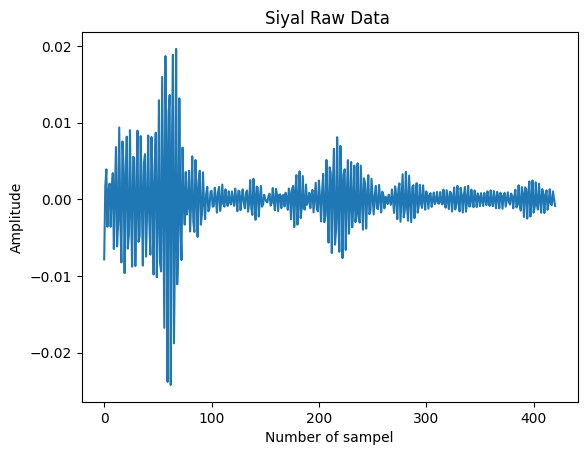

In [746]:
# Ploting Data Radar 
plt.title("Siyal Raw Data ")
plt.plot(Raw_radar[0,:])
# plt.plot(Raw_radar[10,:])
plt.xlabel("Number of sampel")
plt.ylabel('Amplitude')

## Tahap Downconvertion 
* Pada tahapan ini dilakukan untuk mendapatkan sinyal baseband 

In [747]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def downconversion(rf_data,fc,fs):
    # multiply frame by a complex sine 
    csine = np.exp(-1j*fc/fs*2*np.pi*np.arange(rf_data.shape[1]))
    cframe = rf_data * csine
    
    # low pass filter with a hamming low pass tps = 26   
    taps = 26
    cut_off = 0.1
    h = signal.firwin(taps, cut_off, window='hamming')
    
    baseband_data = []
    
    for i in range(rf_data.shape[0]):
        baseband_data.append(signal.filtfilt(h, 1.0, cframe[i,:]))
        
    baseband_data = np.asarray(baseband_data)
    
    return baseband_data

In [748]:
def RF_downconversion(data,fc,fs):
    baseband = True 
    data = downconversion(data, fc, fs)
    return data 

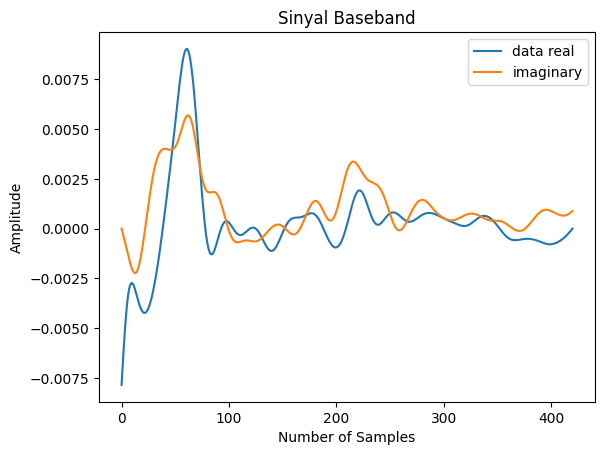

In [749]:
# Berikut adalah hasil raw data baseband
data_baseband = RF_downconversion(Raw_radar, param['fc'],param['fs'])
# Ploting baseband
col1 = data_baseband[0,:]
plt.title("Sinyal Baseband")
plt.plot(col1.real, label='data real')
plt.plot(col1.imag, label='imaginary')
plt.xlabel("Number of Samples")
plt.ylabel("Amplitude")
plt.legend()

In [750]:
slowtime_axis = np.linspace(0, Raw_radar.shape[1], Raw_radar.shape[1], endpoint=False) 
fs = param['fs']
fps = param['fps']
fps

20.0

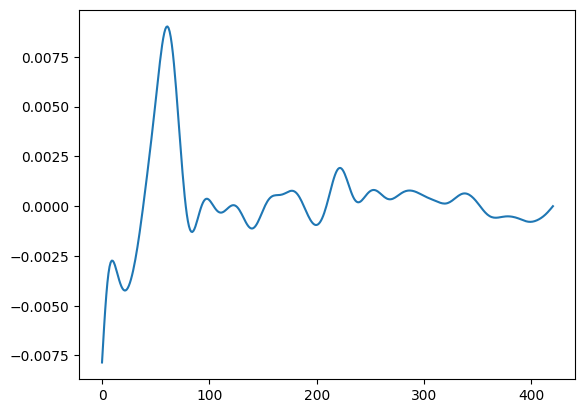

In [751]:
plt.plot(data_baseband[0,:].real,label='real')


In [752]:
# # Parameter-parameter yang digunakan 
fasttime_size = Raw_radar.shape[1]
distance_axis = np.linspace(param["area_start"], param["area_end"], fasttime_size, endpoint=True)
# mag = abs(data_baseband[10,:])
# plt.plot(distance_axis[:200], mag[:200])
# plt.title('Hasil Amplitude Plot I/Q (baseband)')
# plt.ylabel("Magnitude")
# plt.xlabel("Range (m)")

In [753]:
# mag1 = abs(Raw_radar[0,:])
# mag2 = abs(Raw_radar[150,:])
# plt.plot(distance_axis[:200], mag1[:200])
# plt.plot(distance_axis[:200], mag2[:200])
# plt.title('Hasil Amplitude (RF))')
# plt.ylabel("Magnitude")
# plt.xlabel("Range (m)")

## Ploting Range Doppler 

In [754]:
data_baseband.shape

(48, 421)

In [755]:
def MTI(hasil_fft):
    clutter = np.zeros((hasil_fft.shape[0], hasil_fft.shape[1]), dtype=complex)
    OutputData = np.zeros((hasil_fft.shape[0],  hasil_fft.shape[1]), dtype=complex)
    alpha = 0.7

    for j in range(1,hasil_fft.shape[0]):
        clutter[j,:] = alpha * hasil_fft[j,:] + (1 - alpha) * clutter[j-1,:]
        OutputData[j,:] = hasil_fft[j,:] - clutter[j,:]

    return OutputData


In [756]:
# clutter rmeoval
dc_rm = MTI(data_baseband)
dc_rm = dc_rm[1:,:]

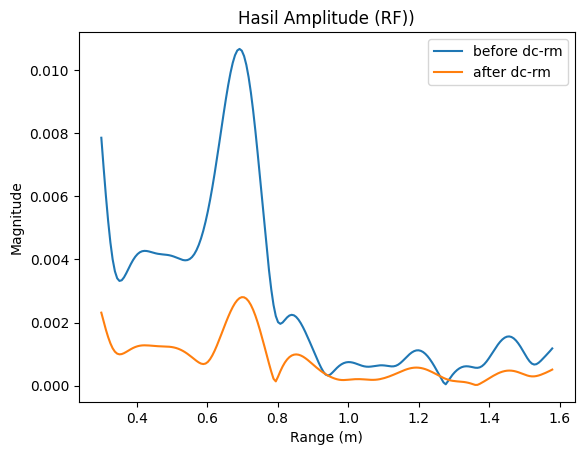

In [757]:
mag1 = abs(data_baseband[0,:])
mag2 = abs(dc_rm[0,:])
plt.plot(distance_axis[:200], mag1[:200], label='before dc-rm')
plt.plot(distance_axis[:200], mag2[:200],label='after dc-rm')
plt.title('Hasil Amplitude (RF))')
plt.ylabel("Magnitude")
plt.xlabel("Range (m)")
plt.legend()

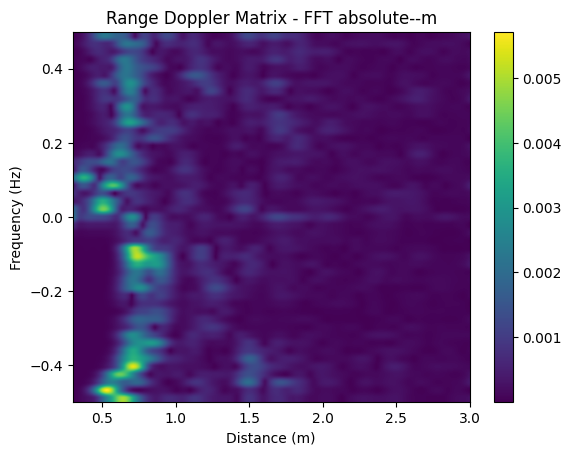

In [758]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sfft

def cut_spectrum(fs, z, cut):
    return fs[:cut], z[:cut, :]

def plot_range_doppler_matrix(data, param, bas, freq,name, max_frequency_value=0,):
    fasttime_size = int(data.shape[1])
    distance_axis = np.linspace(param["area_start"], param["area_end"], fasttime_size, endpoint=True)
    d = distance_axis
    fs = freq
    
    z = data
    # mti proses
    # clutter = np.zeros((z.shape[0], z.shape[1]), dtype=complex)
    # OutputData = np.zeros((z.shape[0], z.shape[1]), dtype=complex)
    # alpha = 0.002
    
    # for j in range(1, z.shape[0]):
    #     clutter[j,:] = alpha * z[j,:] + (1 - alpha) * clutter[j - 1,:]
    #     OutputData[j,:] = z[j,:] - clutter[j, :]

    z = sfft.fftshift(z, axes=0)
    fs = np.array(fs)
    
    if max_frequency_value != 0:
        print("plot")
        frequency = max_frequency_value
        cut = int(np.where(fs >= frequency)[0][0])
        fs, z = cut_spectrum(fs, z, cut)

    if bas == "absolute":
        z = np.abs(z)
    elif bas == "phase":
        z = np.unwrap(np.angle(z))
    
    plt.imshow(z, extent=[d.min(), d.max(), fs.min(), fs.max()], aspect='auto')
    
    plt.xlabel('Distance (m)')
    plt.ylabel('Frequency (Hz)')

    if bas == "absolute":
        plt.title(f'Range Doppler Matrix - FFT absolute-{name}-m')
    elif bas == "phase":
        plt.title('range doppler Matrix - FFT phase')

    plt.colorbar()
    plt.show()

# Example usage:
param = param
data = dc_rm 
freq = np.fft.fftfreq(data.shape[1])
plot_range_doppler_matrix(data, param, "absolute", freq, max_frequency_value=0,name=distance_str)


In [759]:
z = data_baseband

In [760]:
clutter = np.zeros((z.shape[0], z.shape[1]), dtype=complex)
OutputData = np.zeros((z.shape[0], z.shape[1]), dtype=complex)
alpha = 0.1

for j in range(1, z.shape[0]):
    clutter[j,:] = alpha * z[j,:] + (1 - alpha) * clutter[j - 1,:]
    OutputData[j,:] = z[j,:] - clutter[j, :]


In [761]:
data_baseband.shape

(48, 421)

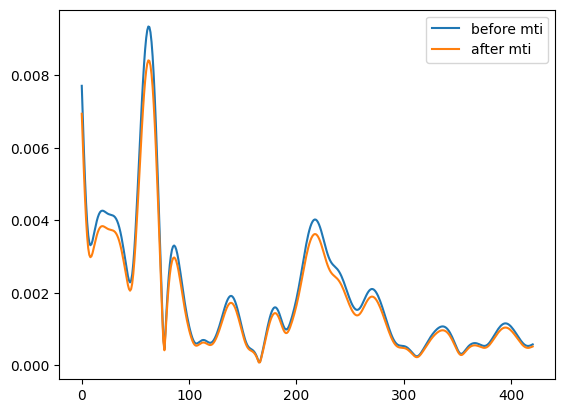

In [762]:
a = OutputData[1,:]
b = data_baseband[1,:]
plt.plot(abs(b),label='before mti')
plt.plot(abs(a),label='after mti')
plt.legend()

In [763]:
import numpy as np

# Data awal
data_awal = data_baseband

# Mengubah bentuk data
data_hasil = data_awal.T  # Menggunakan transpose

# atau
# data_hasil = data_awal.reshape((421, 1448))  # Menggunakan reshape

# Cek bentuk baru
print(data_hasil.shape)


(421, 48)


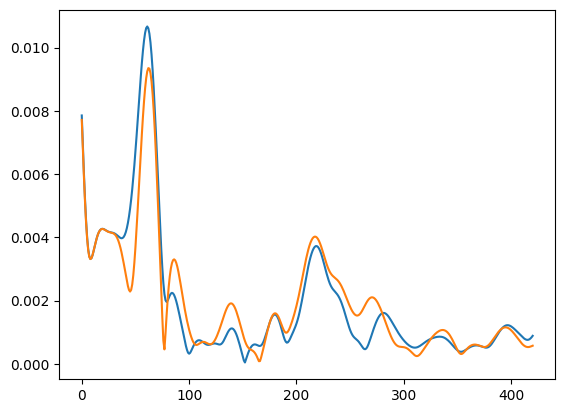

In [764]:
x = data_hasil[:,0]
plt.plot(abs(x))
plt.plot(abs(b),label='before mti')

In [765]:
data_hasil.shape[-1]

48

In [766]:
Hasil_MTI = MTI(dc_rm )
Hasil_MTI.shape

(47, 421)

In [767]:
Hasil_mti = Hasil_MTI[1:,:]
Hasil_mti.shape

(46, 421)

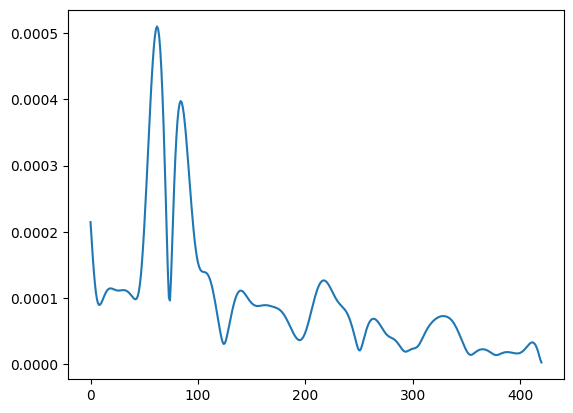

In [768]:
x1 = Hasil_mti[0,:]
plt.plot(abs(x1))

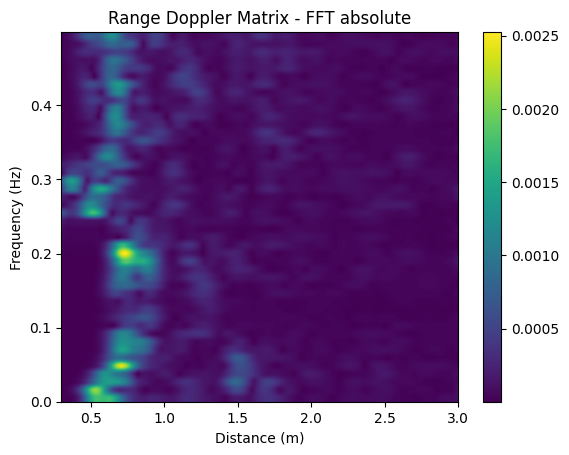

In [769]:


import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sfft

def cut_spectrum(fs, z, cut):
    return fs[:cut], z[:cut, :]

def plot_range_doppler_matrix(data, param, bas, freq, max_frequency_value=0):
    fasttime_size = int(data.shape[1])
    distance_axis = np.linspace(param["area_start"], param["area_end"], fasttime_size, endpoint=True)
    d = distance_axis
    fs = freq
    
    z = data
    z = sfft.fftshift(z, axes=0)
    fs = np.array(fs)
    
    if max_frequency_value != 0:
        print("plot")
        frequency = max_frequency_value
        cut = int(np.where(fs >= frequency)[0][0])
        fs, z = cut_spectrum(fs, z, cut)

    if bas == "absolute":
        z = np.abs(z)
    elif bas == "phase":
        z = np.unwrap(np.angle(z))
    
    plt.imshow(z, extent=[d.min(), d.max(), 0, fs.max()], aspect='auto')
    
    plt.xlabel('Distance (m)')
    plt.ylabel('Frequency (Hz)')

    if bas == "absolute":
        plt.title('Range Doppler Matrix - FFT absolute')
    elif bas == "phase":
        plt.title('range doppler Matrix - FFT phase')

    plt.colorbar()
    plt.show()

# Example usage:
param = param
data = Hasil_mti
freq = np.fft.fftfreq(data.shape[1])
plot_range_doppler_matrix(data, param, "absolute", freq, max_frequency_value=0)


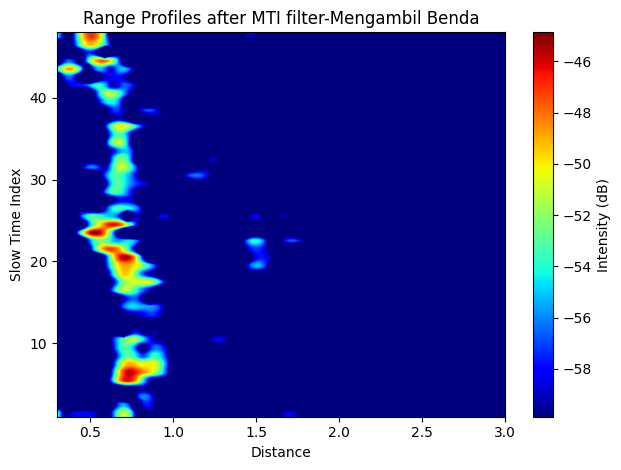

In [774]:
import matplotlib.pyplot as plt
import numpy as np


# Generate distance_axis
distance_axis = np.linspace(param["area_start"], param["area_end"], dc_rm.shape[1], endpoint=True)

# Generate distance_axis
# distance_axis = np.linspace(param["area_start"], param["area_end"], dc_rm.shape[1], endpoint=True)

# Plot the range profile with distance_axis as the x-axis
plt.figure()
img = plt.imshow(
    20 * np.log10(np.abs(dc_rm)),
    cmap="jet",
    origin="lower",
    aspect="auto",
    extent=[distance_axis[0], distance_axis[-1], 1, 48]  # Set x-axis limits using extent
)

plt.xlabel("Distance")
plt.ylabel("Slow Time Index")

# Uncomment the line below if you want to add a title
plt.title('Range Profiles after MTI filter-Mengambil Benda')

# Set color limits
clim = img.get_clim()
img.set_clim([clim[1] - 15, clim[1]])

# Draw and show the plot
plt.colorbar(label='Intensity (dB)')
plt.draw()
plt.tight_layout()
plt.show()
